## Housing Data Cleaning,EDA and Recommendation

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from pandas_profiling import ProfileReport

In [3]:
#read census data to dataframe with pandas
census_df = pd.read_csv('census_13_2022.csv')

In [4]:
#create a copy  of the data
census_df = census_df.copy()

## 1 Cleaning Data

In [5]:
census_df

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Phillips Overpass,Luke,Walker,64,Head,Single,Male,Television/film/video producer,None,Methodist
1,1,1,Phillips Overpass,Karl,Smith,64,None,Single,Male,Unemployed,None,None
2,2,1,Phillips Overpass,Catherine,Harris,29,None,Single,Female,"Buyer, industrial",None,Christian
3,3,1,Phillips Overpass,Jennifer,Green,64,None,Single,Female,Risk analyst,None,None
4,4,1,Phillips Overpass,Bethan,Atkins,30,None,Single,Female,"Psychologist, clinical",None,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
7619,7619,1,Wood Keep,Valerie,Marshall,29,Head,Divorced,Female,Unemployed,None,Catholic
7620,7620,1,Wood Keep,Joyce,Marshall,0,Daughter,NaN,Female,Child,None,NaN
7621,7621,1,Wood Keep,Leslie,Reed,33,Lodger,Single,male,Land,None,Christian
7622,7622,1,Wood Keep,Shane,Newman,53,Lodger,Single,Male,Actuary,None,None


In [6]:
#basic infomation of the dataframe
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7624 entries, 0 to 7623
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Index                          7624 non-null   int64 
 1   House Number                   7624 non-null   object
 2   Street                         7624 non-null   object
 3   First Name                     7624 non-null   object
 4   Surname                        7624 non-null   object
 5   Age                            7624 non-null   object
 6   Relationship to Head of House  7624 non-null   object
 7   Marital Status                 5978 non-null   object
 8   Gender                         7624 non-null   object
 9   Occupation                     7624 non-null   object
 10  Infirmity                      7624 non-null   object
 11  Religion                       5915 non-null   object
dtypes: int64(1), object(11)
memory usage: 714.9+ KB


In [7]:
#null values in Marital Status and Gender.
#Dtype such as Age needs to be looked at.

In [8]:
#finding total null values in the dataset
census_df.isnull().sum()

Index                               0
House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1646
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1709
dtype: int64

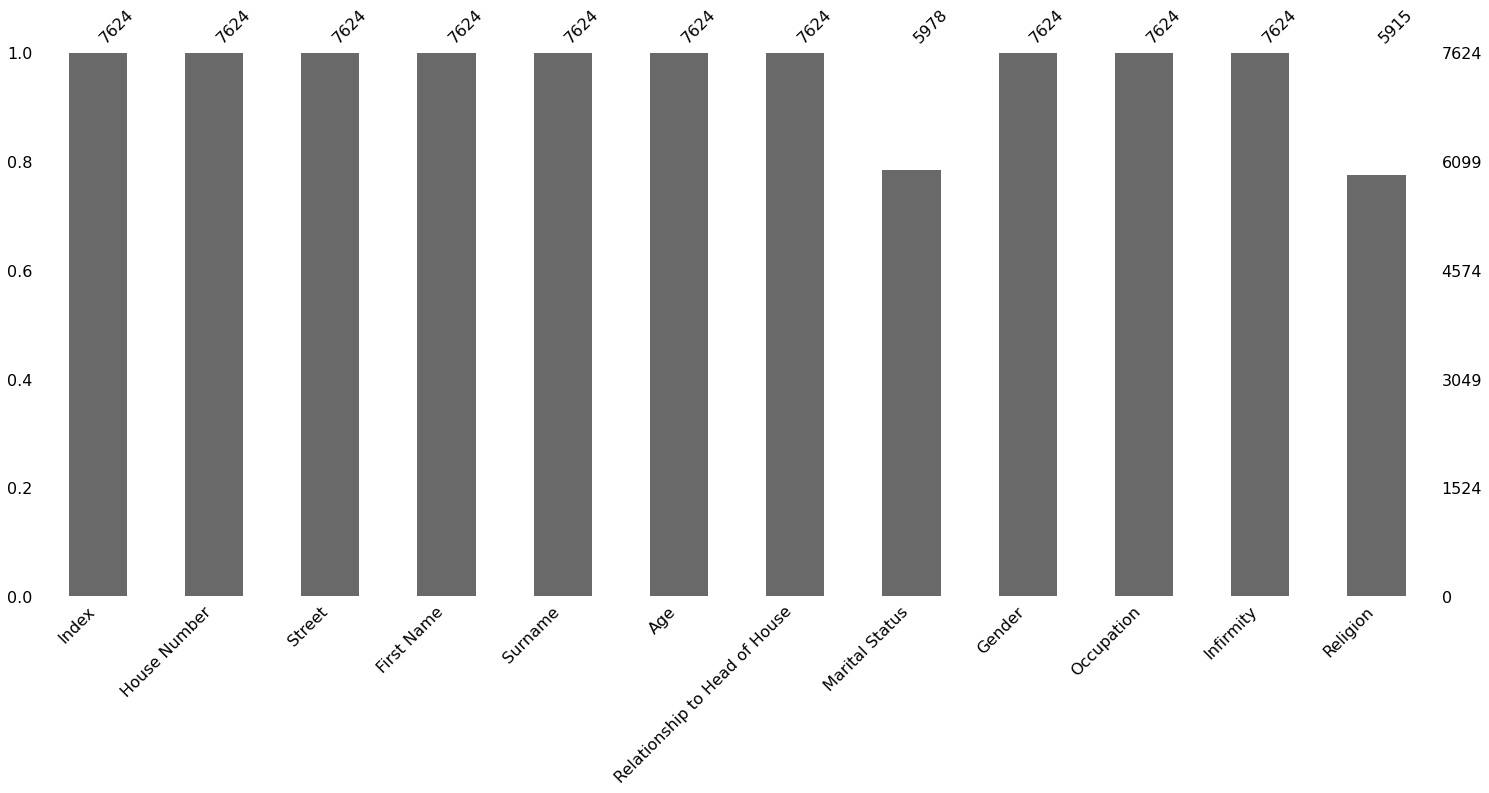

In [9]:
#Visualizing null values (bars)
bar_msno = msno.bar(census_df)
plt.savefig('bar_msno')

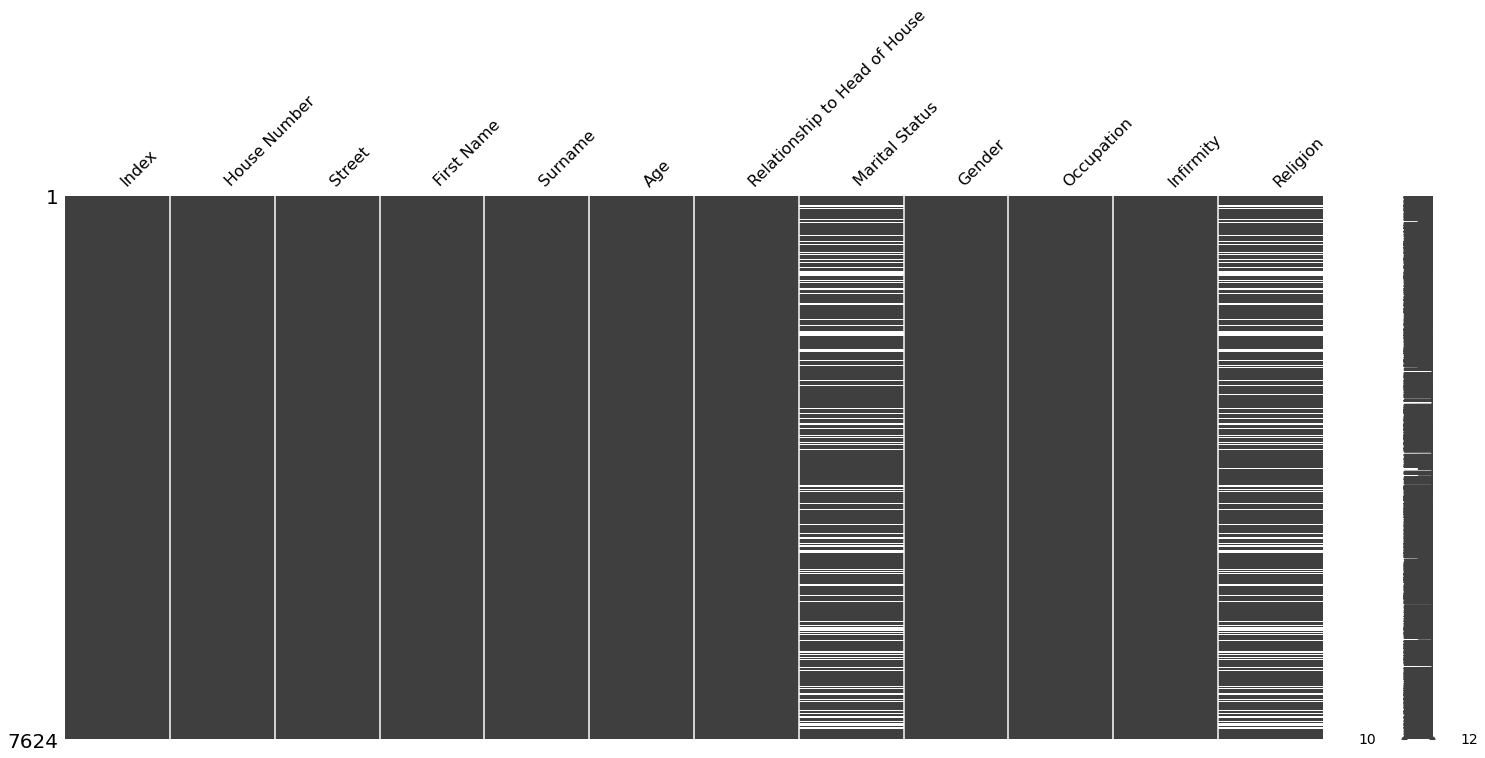

In [10]:
#Visualizing null values (matrix)
matrix_msno = msno.matrix(census_df)
plt.savefig('matrix_msno')

In [11]:
#finding duplicates in the dataset
census_df.duplicated().sum()

0

In [12]:
#finding unique values of each column 
unique_housenumber = census_df['House Number'].unique()
unique_street = census_df['Street'].unique()
unique_firstname = census_df['First Name'].unique()
unique_surname = census_df['Surname'].unique()
unique_age = census_df['Age'].unique()
unique_relationship = census_df['Relationship to Head of House'].unique()
unique_marital = census_df['Marital Status'].unique()
unique_gender = census_df['Gender'].unique()
unique_occu = census_df['Occupation'].unique()
unique_infirmity = census_df['Infirmity'].unique()
unique_religion = census_df['Religion'].unique()

### 1.1 House Number Cleaning

In [13]:
#unique values in house number
unique_housenumber

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [14]:
#fixing errors in house number

In [15]:
#Seaching for Null Values
census_df[census_df['House Number'].isnull()]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [16]:
census_df.loc[census_df['House Number']=='Four', 'House Number'] = 4

In [17]:
census_df['House Number'].fillna(4, inplace=True) #make replacement permanent

In [18]:
census_df['House Number'] = census_df['House Number'].astype(int)

In [19]:
census_df['House Number'].dtype

dtype('int64')

In [20]:
census_df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### 1.2  Street Name Cleaning

In [21]:
unique_street

array(['Phillips Overpass', 'Iris Road', 'Yucca Ranch', 'Simmons Grove',
       'Lawrence Stream', 'King Street', 'Aries Street', 'Saunders Cliff',
       'Regent Lane', 'Wolverine Avenue', 'Brightwaterfast Road',
       'Singh Radial', 'Cottingham Street', 'Bletchley Avenue',
       'Cambridge Street', 'Apricot Road', 'Roman Drive', 'King Circle',
       'Toucannod Avenue', 'Reynolds Drives', 'Young Street',
       'Willow Lane', 'Todd Lane', 'May Vista', 'Arthur Roads',
       'Heath Avenue', 'Manning Locks', 'Williams Freeway',
       'Macdonald Extension', 'Squirrel Valley', 'Salmon Road',
       'Minster Summit', 'Tannery Rue', 'Taylor Ranch', 'Thomas Avenue',
       'Abbott Drive', 'Leviathan Lodge', 'Field Ways', 'Foxglove Street',
       'Landings Lane', 'Earl Lane', 'Grape Road', 'Powys Corner',
       'Godfrey Shoals', 'Cook Lane', 'Lawrence Road', 'White Road',
       'Anderson Trail', 'Harris Place', 'Leeds Shoal', 'Tulip Street',
       'Sandy Villages', 'Kaur Street', 'Ev

In [22]:
#Seaching for Spaces
census_df.loc[census_df['Street'] == ' ']

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [23]:
#Seaching for Null Values
census_df[census_df['House Number'].isnull()]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [24]:
#street makes sense and doesn't need any changes and has no null or empty values

### 1.3  First Name & Surname Cleaning

In [25]:
unique_firstname

array(['Luke', 'Karl', 'Catherine', 'Jennifer', 'Bethan', 'Stephanie',
       'Ronald', 'Dean', 'Nathan', 'Chelsea', 'Josh', 'Kyle', 'Irene',
       'Donald', 'Duncan', 'Rachel', 'Alexander', 'Jack', 'Dennis',
       'Judith', 'Anne', 'Shannon', 'Marilyn', 'Scott', 'Francis',
       'Rebecca', 'Frank', 'Caroline', 'Gillian', 'Melissa', 'Jay',
       'Donna', 'Grace', 'Carl', 'Maria', 'Toby', 'Frederick', 'Maureen',
       'Ricky', 'Leanne', 'Tom', 'Jasmine', 'Clare', 'Mohammad', 'Peter',
       'Hannah', 'Rita', 'Terence', 'Graeme', 'Lynne', 'Leslie', 'Sarah',
       'Elliot', 'June', 'Barry', 'Mohammed', 'Dylan', 'Clifford',
       'Mathew', 'Linda', 'Louise', 'Albert', 'Yvonne', 'Angela', 'Jane',
       'Robert', 'Jayne', 'Sara', 'Joanne', 'Abbie', 'Mitchell',
       'Alexandra', 'Colin', 'Kathryn', 'Sally', 'Samantha', 'Arthur',
       'Pamela', 'Norman', 'Victoria', 'Margaret', 'Ryan', 'Derek',
       'Sandra', 'Bethany', 'Rachael', 'Roy', 'Daniel', 'Ross', 'Heather',
       'Ann',

In [26]:
#Searching for spaces
census_df.loc[census_df['First Name'] == ' ']

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [27]:
#Seaching for Null Values
census_df[census_df['First Name'].isnull()]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [28]:
#first name makes sense and has no null or empty values

#### Surname

In [29]:
unique_surname

array(['Walker', 'Smith', 'Harris', 'Green', 'Atkins', 'Lewis', 'Clark',
       'Dunn', 'Taylor', 'Shaw', 'Hill', 'Brown', 'Thompson', 'Macdonald',
       'Payne', 'Riley', 'Davies', 'Davies-Richardson', 'Dennis', 'Sykes',
       'Newman', 'Douglas', 'Lane', 'Hunt', 'Hawkins', 'Goddard',
       'Sanders', 'Watkins', 'Coleman', 'Sutton', 'Todd', 'Mann',
       'Wilson', 'Richards', 'Wilson-Richards', 'Hussain-Green', 'Murray',
       'Scott', 'Flynn', 'Grant', 'Harrison', 'Webster', 'Chambers',
       'Leonard', 'Davis', 'Gray', 'Ward', 'Davies-Ward', 'Hewitt',
       'Evans', 'Reid', 'Roberts', 'Allen', 'Morley', 'Chapman', 'Jordan',
       'Kelly', 'Freeman', 'Johnson', 'Winter', 'Cole', 'Lee', 'Matthews',
       'Jones', 'Rose', 'McCarthy', 'Morris', 'McKenzie', 'Thorpe',
       'Iqbal', 'Jackson', 'Bowen', 'Atkinson', 'Browne', 'Francis',
       'Armstrong', 'Lawrence', 'Hopkins', 'Thomas', 'Barnett', 'Moss',
       'Thornton', 'Stephens', 'Knight', 'Howard', 'Peacock-Sanderson',
  

In [30]:
#Searching for spaces
census_df.loc[census_df['Surname'] == ' ']

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [31]:
#Seaching for Null Values
census_df[census_df['Surname'].isnull()]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### 1.4  Age Cleaning

In [32]:
unique_age

array(['64', '29', '30', '24', '28', '37', '56', '54', '59', '16', '32',
       '34', '3', '2', '39', '0', '50', '47', '48', '15', '51', '52',
       '43', '62', '38', '13', '36', '27', '46', '57', '81', '85', '49',
       '42', '18', '21', '35', '19', '8', '5', '1', '45', '20', '23',
       '33', '31', '80', '82', '69', '6', '40', '53', '12', '83', '7',
       '76', '77', '67', '65', '22', '44', '11', '55', '14', '63', '61',
       '25', '17', '41', '58', '60', '4', '74', '9', '78', '26', '73',
       '71', '68', '66', '10', '79', '72', '99', '87', '89', '91', '86',
       '70', '75', '88', 'one', '93', '94', '95', '90', '49.77636636',
       '105', '84', '104', '79.3573726', '100', '98', '103', '92', '96',
       '97', ' '], dtype=object)

In [33]:
#age has strings,floats,and empty values

In [34]:
#Seaching for Null Values
census_df[census_df['Age'].isnull()]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [35]:
#replacing empty values with nan
census_df.loc[census_df['Age']==' ', 'Age'] = np.nan

In [36]:
#reading the NaN value to better understand what needs to be done
census_df[census_df['Age'].isna()]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7571,7571,1,Campbell Warehouse,Sarah,Bryan,NaN,None,Single,Female,Student,None,NaN


In [37]:
#chnaging one to 1 using loc
census_df.loc[census_df['Age']=='one', 'Age'] = 1

In [38]:
#casting Age as float
census_df['Age'] = census_df['Age'].astype(float)

In [39]:
#finding the mode of the age
census_df['Age'].mode()

0    18.0
Name: Age, dtype: float64

In [40]:
#replacing the NaN value with the mode as that makes sense
census_df['Age'].fillna(18.0, inplace=True) #make replacement permanent

In [41]:
#casting the age column to int
census_df['Age'] = census_df['Age'].astype(int)

In [42]:
census_df['Age'].dtype

dtype('int64')

In [43]:
census_df['Age'].unique()

array([ 64,  29,  30,  24,  28,  37,  56,  54,  59,  16,  32,  34,   3,
         2,  39,   0,  50,  47,  48,  15,  51,  52,  43,  62,  38,  13,
        36,  27,  46,  57,  81,  85,  49,  42,  18,  21,  35,  19,   8,
         5,   1,  45,  20,  23,  33,  31,  80,  82,  69,   6,  40,  53,
        12,  83,   7,  76,  77,  67,  65,  22,  44,  11,  55,  14,  63,
        61,  25,  17,  41,  58,  60,   4,  74,   9,  78,  26,  73,  71,
        68,  66,  10,  79,  72,  99,  87,  89,  91,  86,  70,  75,  88,
        93,  94,  95,  90, 105,  84, 104, 100,  98, 103,  92,  96,  97])

### 1.5  Relationship Cleaning

In [44]:
unique_relationship

array(['Head', 'None', 'Son', 'Husband', 'Partner', 'Daughter', 'Sibling',
       'Lodger', 'Wife', 'Neice', ' ', 'Visitor', 'Granddaughter',
       'Adopted Granddaughter', 'Cousin', 'Nephew', 'Step-Daughter',
       'Step-Son', 'Grandson', 'Adopted Son', 'Adopted Daughter',
       'Son-in-law', 'Daughter-in-law'], dtype=object)

In [45]:
#finding spaces
census_df.loc[census_df['Relationship to Head of House'] == ' ']

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
119,119,24,Iris Road,Stacey,Jordan,32,,Single,Female,Sports coach,None,Christian
7159,7159,28,Zigzag Corner,Lynda,Smith,48,,Single,Female,Charity officer,None,Catholic


In [46]:
#Seaching for Null Values
census_df[census_df['Relationship to Head of House'].isnull()]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [47]:
#replacing empty values with None
census_df['Relationship to Head of House'].replace(" ", "None", inplace = True)

In [48]:
census_df['Relationship to Head of House'].fillna('None', inplace=True)

In [49]:
census_df['Relationship to Head of House'].unique()

array(['Head', 'None', 'Son', 'Husband', 'Partner', 'Daughter', 'Sibling',
       'Lodger', 'Wife', 'Neice', 'Visitor', 'Granddaughter',
       'Adopted Granddaughter', 'Cousin', 'Nephew', 'Step-Daughter',
       'Step-Son', 'Grandson', 'Adopted Son', 'Adopted Daughter',
       'Son-in-law', 'Daughter-in-law'], dtype=object)

### 1.6  Marital Status Cleaning

In [50]:
unique_marital

array(['Single', 'Divorced', 'Married', nan, 'Widowed', 'D', ' ', 'M',
       'S', 'W'], dtype=object)

In [51]:
mstat = {'S': "Single","D": "Divorced", "M": "Married", "W": "Widowed"," ": "None",}

census_df["Marital Status"].replace(mstat, inplace=True)

In [52]:
census_df.loc[census_df['Marital Status']== 'None', 'Marital Status'] = 'Single'

In [53]:
#Fixing Marital Status of Minors/Children
census_df.loc[(census_df['Age'] < 18) & (census_df["Marital Status"] == 'Divorced'), 'Marital Status'] = 'NA'
census_df.loc[(census_df['Age'] < 18) & (census_df["Marital Status"] == 'Widowed'), 'Marital Status'] = 'NA'
census_df.loc[(census_df['Age'] < 18) & (census_df["Marital Status"] == 'Married'), 'Marital Status'] = 'NA'

In [54]:
census_df['Marital Status'].fillna('NA', inplace=True)

In [55]:
census_df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', 'NA', 'Widowed'], dtype=object)

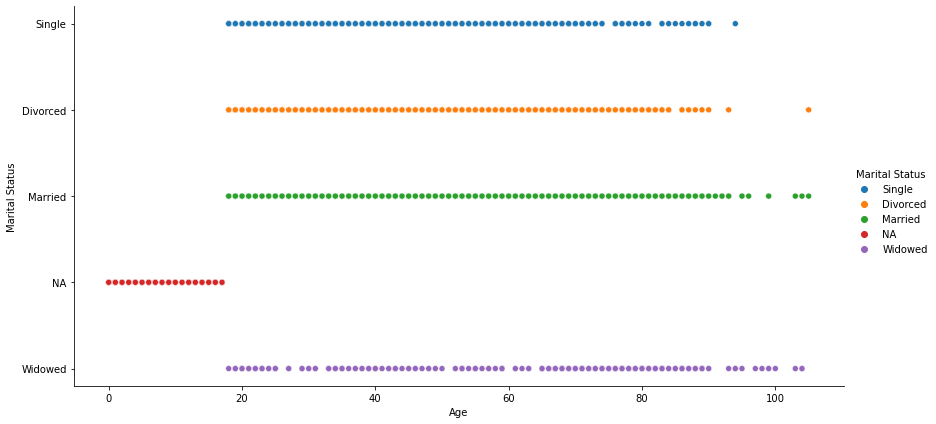

In [56]:
agemaritalplot1 = sns.relplot(data = census_df, x= 'Age', y = 'Marital Status', hue = 'Marital Status',
                        height = 6, aspect = 2)
plt.savefig('agemaritalplot1')

### 1.7 Gender Cleaning

In [57]:
unique_gender

array(['Male', 'Female', 'male', 'M', 'F', 'm', 'f', 'female', ' '],
      dtype=object)

In [58]:
#finding empty values
census_df.loc[census_df['Gender']==' '] 

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6527,6527,3,Dunn Harbor,Ronald,Carter,10,Son,NA,,Student,None,NaN


In [59]:
#Output shows Relationship to Head of House as son; so gender should be Male
census_df.loc[census_df['Gender']== ' ', 'Gender'] = 'Male'

In [60]:
census_df['Gender'].fillna('Male', inplace=True)

In [61]:
genrp = {'male': "Male","M": "Male", "m": "Male", "female": "Female","f": "Female","F":"Female"}

census_df["Gender"].replace(genrp, inplace=True)

In [62]:
census_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### 1.8 Occupation Cleaning

In [63]:
unique_occu

array(['Television/film/video producer', 'Unemployed',
       'Buyer, industrial', ..., 'Retired Environmental manager',
       'Retired Telecommunications researcher',
       'Retired Financial planner'], dtype=object)

In [64]:
#finding empty values
census_df.loc[census_df['Occupation']== ' ']

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [65]:
census_df.loc[census_df['Occupation']== 'Child']

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
17,17,5,Phillips Overpass,Jack,Brown,3,Son,NA,Male,Child,None,NaN
18,18,5,Phillips Overpass,Dennis,Brown,2,Son,NA,Male,Child,None,NaN
20,20,6,Phillips Overpass,Anne,Macdonald,0,Daughter,NA,Female,Child,None,NaN
27,27,8,Phillips Overpass,Caroline,Davies-Richardson,2,Daughter,NA,Female,Child,None,NaN
30,30,9,Phillips Overpass,Jay,Sykes,0,Son,NA,Male,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7473,7473,39,Anvil Drive,Megan,Harris-Hancock,0,Daughter,NA,Female,Child,None,NaN
7524,7524,29,Portsmouth Freeway,Anthony,Gill,0,Son,NA,Male,Child,None,NaN
7543,7543,1,Truro Longhouse,Dennis,Ryan,2,Son,NA,Male,Child,None,NaN
7554,7554,1,Taylor Ranch,Damian,Bond,2,Son,NA,Male,Child,None,NaN


### Occupation Categories

In [66]:
census_df[census_df['Occupation'].isna()]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [67]:
census_df.loc[(census_df['Age'] < 17) & (census_df["Occupation"] == 'Student'), 'Employment Category'] = 'Student(Child)'
census_df.loc[(census_df['Age'] >16 ) & (census_df["Occupation"] == 'Student'), 'Employment Category'] = 'Student'
census_df.loc[(census_df['Age'] >16 ) & (census_df["Occupation"] == 'University Student'), 'Employment Category'] = 'Student'
census_df.loc[(census_df['Age'] > 64) , 'Employment Category'] = 'Retired'
census_df.loc[(census_df['Age'] <65 ) & (census_df["Occupation"] == 'Unemployed'), 'Employment Category'] = 'Unemployed'
census_df.loc[(census_df["Occupation"] == 'Child') , 'Employment Category'] = 'Child'
census_df.loc[(census_df['Employment Category'] == ' ') , 'Employment Category'] = 'Employed'
census_df.loc[(census_df["Occupation"] == 'PhD Student') , 'Employment Category'] = 'Student'

In [68]:
census_df['Employment Category'].fillna('Employed', inplace=True)
census_df['Employment Category'].fillna('Unemployed', inplace=True)
census_df['Employment Category'].fillna('Student(Child)', inplace=True)
census_df['Employment Category'].fillna('Retired', inplace=True)
census_df['Employment Category'].fillna('Student', inplace=True)
census_df['Employment Category'].fillna('Child', inplace=True)

In [69]:
census_df['Employment Category'].unique()

array(['Employed', 'Unemployed', 'Student(Child)', 'Child', 'Retired',
       'Student'], dtype=object)

In [70]:
census_df.loc[(census_df['Occupation'].str.contains('Retired'))& (census_df['Age'] >65)]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Category
44,44,14,Phillips Overpass,Peter,Thompson,81,Head,Married,Male,Retired Optometrist,None,Christian,Retired
45,45,14,Phillips Overpass,Hannah,Thompson,85,Wife,Married,Female,"Retired Physicist, medical",None,Christian,Retired
87,87,12,Iris Road,Margaret,Chambers,80,Head,Married,Female,"Retired Presenter, broadcasting",None,Methodist,Retired
88,88,12,Iris Road,Ryan,Chambers,82,Husband,Married,Male,Retired Community arts worker,None,Methodist,Retired
90,90,13,Iris Road,Joanne,Lewis,69,Wife,Married,Female,"Retired Engineer, energy",None,Christian,Retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7532,7532,36,Portsmouth Freeway,Leigh,Harper,75,Head,Widowed,Male,Retired Telecommunications researcher,None,Christian,Retired
7533,7533,37,Portsmouth Freeway,Russell,Turner,69,Head,Married,Male,Retired Scientific laboratory technician,None,None,Retired
7538,7538,39,Portsmouth Freeway,Cheryl,West,79,Head,Widowed,Female,Retired Pensions consultant,None,None,Retired
7539,7539,40,Portsmouth Freeway,Sylvia,Powell,72,Head,Single,Female,Retired Financial planner,None,Christian,Retired


### 1.9 Infirmity

In [71]:
unique_infirmity

array(['None', ' ', 'Blind', 'Physical Disability', 'Disabled',
       'Mental Disability', 'Deaf', 'Unknown Infection'], dtype=object)

In [72]:
#finding empty values
census_df.loc[census_df['Infirmity']== ' ']

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Category
24,24,7,Phillips Overpass,Francis,Riley,15,Son,NA,Male,Student,,NaN,Student(Child)
1517,1517,6,Todd Lane,Josh,Howard,19,Son,Single,Male,University Student,,None,Student
2771,2771,12,Powys Corner,Caroline,McCarthy,21,None,Single,Female,University Student,,None,Student
3017,3017,25,Harris Place,Andrew,Fraser,13,Son,NA,Male,Student,,NaN,Student(Child)
4389,4389,69,Tiger Avenue,Geraldine,Clarke,17,Daughter,NA,Female,Student,,NaN,Student


In [73]:
#change empty values to None
census_df.loc[census_df['Infirmity']==' ', 'Infirmity'] = 'None'

In [74]:
census_df['Infirmity'].fillna('None', inplace=True)

In [75]:
census_df['Infirmity'].unique()

array(['None', 'Blind', 'Physical Disability', 'Disabled',
       'Mental Disability', 'Deaf', 'Unknown Infection'], dtype=object)

### 1.10 Religion Cleaning

In [76]:
unique_religion

array(['Methodist', 'None', 'Christian', 'Catholic', nan, 'Muslim',
       'Sikh', 'Nope', 'Orthodoxy', 'Private', 'Jewish', 'Agnostic',
       'Housekeeper', ' ', 'Pagan', 'Bahai'], dtype=object)

In [77]:
census_df.loc[census_df['Religion']=='Orthodoxy']

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Category
251,251,23,Simmons Grove,Megan,Ford,25,Head,Single,Female,Multimedia specialist,None,Orthodoxy,Employed


In [78]:
#change empty values to None
census_df.loc[census_df['Religion']==' ', 'Religion'] = 'None'
census_df.loc[census_df['Religion']=='Nope', 'Religion'] = 'None'
#change housekeeper to None
census_df.loc[census_df['Religion']=='Housekeeper', 'Religion'] = 'None'
census_df.loc[census_df['Religion']=='Orthodoxy', 'Religion'] = 'Christian'

In [79]:
census_df['Religion'].fillna('None', inplace=True)
census_df['Religion'].fillna('Christian', inplace=True)

In [80]:
census_df['Religion'].unique()

array(['Methodist', 'None', 'Christian', 'Catholic', 'Muslim', 'Sikh',
       'Private', 'Jewish', 'Agnostic', 'Pagan', 'Bahai'], dtype=object)

In [81]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7624 entries, 0 to 7623
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Index                          7624 non-null   int64 
 1   House Number                   7624 non-null   int64 
 2   Street                         7624 non-null   object
 3   First Name                     7624 non-null   object
 4   Surname                        7624 non-null   object
 5   Age                            7624 non-null   int64 
 6   Relationship to Head of House  7624 non-null   object
 7   Marital Status                 7624 non-null   object
 8   Gender                         7624 non-null   object
 9   Occupation                     7624 non-null   object
 10  Infirmity                      7624 non-null   object
 11  Religion                       7624 non-null   object
 12  Employment Category            7624 non-null   object
dtypes: 

#### Dafaframe Profile

In [82]:
census_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 ## 2.0 Data Analysis (Visualization & Statistics)

#### Population Pyramid

In [83]:
#create age group
range_age = []
for age in census_df['Age']:
    if age <= 4:
        range_age.append('0-4')
    elif age >= 5 and age < 10:
        range_age.append('5-9')
    elif age >= 10 and age < 15:
        range_age.append('10-14')
    elif age >= 15 and age < 20:
        range_age.append('15-19')
    elif age >= 20 and age < 25:
        range_age.append('20-24')
    elif age >= 25 and age < 30:
        range_age.append('25-29')
    elif age >= 30 and age < 35:
        range_age.append('30-34')
    elif age >= 35 and age < 40:
        range_age.append('35-39')
    elif age >= 40 and age < 45:
        range_age.append('40-44')
    elif age >= 45 and age < 50:
        range_age.append('45-49')
    elif age >= 50 and age < 55:
        range_age.append('50-54')
    elif age >= 55 and age < 60:
        range_age.append('55-59')
    elif age >= 60 and age < 65:
        range_age.append('60-64')
    elif age >= 65 and age < 70:
        range_age.append('65-69')
    elif age >= 70 and age < 75:
        range_age.append('70-74')
    elif age >= 75 and age < 80:
        range_age.append('75-79')
    elif age >= 80 and age < 85:
        range_age.append('80-84')
    elif age >= 85 and age < 90:
        range_age.append('85-89')
    elif age >= 90 and age < 95:
        range_age.append('90-94')
    elif age >= 95 and age < 100:
        range_age.append('95-99')
    else:
        range_age.append('100+')
    
census_df['Age Group']  = range_age

In [84]:
range_male = census_df['Age Group'][census_df.Gender == 'Male'].value_counts().sort_index()
range_female = census_df['Age Group'][census_df.Gender == 'Female'].value_counts().sort_index()

In [85]:
pyramid_df = pd.DataFrame({
    'Male': range_male,
    'Female':-1 * range_female
})

In [86]:
pyramid_df.index.names = ['Age_Group']
pyramid_df.reset_index(inplace=True)

In [87]:
order_list = ['100+','95-99','90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59','50-54',
              '45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']
              

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


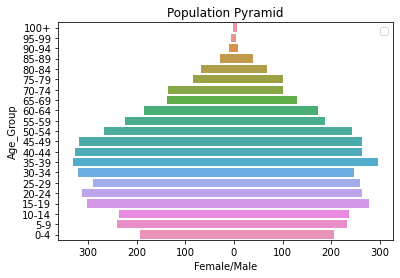

In [88]:
bar_plot = sns.barplot(x='Male', y='Age_Group', data=pyramid_df,
                       order=order_list,lw=0.5) #palette="Blues"
bar_plot = sns.barplot(x='Female', y='Age_Group', data=pyramid_df, 
                       order=order_list,lw=0.5) #palette="Greens"  label='Female'

plt.title("Population Pyramid")
plt.xlabel("Female/Male")

plt.xticks(ticks=[-300,-200, -100, 0, 100, 200, 300],
labels=['300','200', '100', '0', '100', '200','300'])
pop_mid = bar_plot.legend()
plt.savefig('pop_mid')
#plt.grid()

##### Religion Box Plot

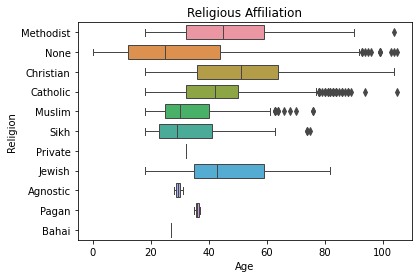

In [89]:
religionboxplt= sns.boxplot(data=census_df, x='Age',y='Religion', 
                            width =0.7, linewidth=1).set(title= 'Religious Affiliation')
plt.savefig('religionboxplt')

##### Religion and Age Plot

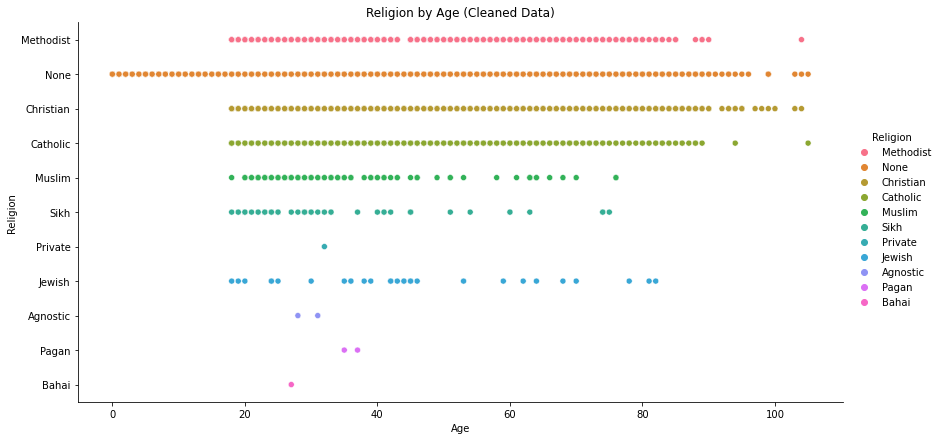

In [90]:
rel_age_plot = sns.relplot(data = census_df, x= 'Age', y = 'Religion', hue = 'Religion',
                        height = 6, aspect = 2).set(title= 'Religion by Age (Cleaned Data)')
plt.savefig('rel_age_plot')

In [91]:
census_df['Religion'].unique()

array(['Methodist', 'None', 'Christian', 'Catholic', 'Muslim', 'Sikh',
       'Private', 'Jewish', 'Agnostic', 'Pagan', 'Bahai'], dtype=object)

In [92]:
Methodistdf =census_df.loc[(census_df['Religion']=='Methodist')]
Christiandf=census_df.loc[(census_df['Religion']=='Christian')]
Catholicdf=census_df.loc[(census_df['Religion']=='Catholic')]
Muslimdf=census_df.loc[(census_df['Religion']=='Muslim')]
Sikhdf=census_df.loc[(census_df['Religion']=='Sikh')]
Jewishdf=census_df.loc[(census_df['Religion']=='Jewish')]
Agnosticdf=census_df.loc[(census_df['Religion']=='Agnostic')]
pagandf=census_df.loc[(census_df['Religion']=='Pagan')]
Bahaidf=census_df.loc[(census_df['Religion']=='Bahai')]

In [93]:
#Calculating the median age for religion
Methodist = round(Methodistdf['Age'].median())
Christian = round(Christiandf['Age'].median())
Catholic = round(Catholicdf['Age'].median())
Muslim = round(Muslimdf['Age'].median())
Sikh = round(Sikhdf['Age'].median())
Jewish =round(Jewishdf['Age'].median())
Agnostic =round(Agnosticdf['Age'].median())
Pagan = round(pagandf['Age'].median())
Bahai = round(Bahaidf['Age'].median())

In [94]:
print(f"Methodist: {Methodist}",
      f"\nChristian: {Christian}",
      f"\nCatholic: {Catholic}",
      f"\nMuslim: {Muslim}",
      f"\nSikh: {Sikh}",
      f"\nJewish: {Jewish}",
      f"\nAgnostic: {Agnostic}",
      f"\nPagan: {Pagan}",
      f"\nBahai: {Bahai}")

Methodist: 45 
Christian: 51 
Catholic: 42 
Muslim: 30 
Sikh: 29 
Jewish: 43 
Agnostic: 30 
Pagan: 36 
Bahai: 27


### Commuters

In [95]:
#none commuters
non_commuters = (census_df.loc[(census_df['Occupation']).str.contains('community') + 
                               (census_df['Occupation']).str.contains('retail',flags=re.IGNORECASE)+
                              (census_df['Occupation']).str.contains('teach',flags=re.IGNORECASE)+
                               (census_df['Occupation']).str.contains('food',flags=re.IGNORECASE)
                              & (census_df['Employment Category']=='Employed')])

In [96]:
#Total number of employed non-commuters
len(non_commuters)
print('Number of Non-Commuters :' + str(len(non_commuters)))

Number of Non-Commuters :153


In [97]:
#Total number of Employed
employed = census_df.loc[(census_df['Employment Category'] == 'Employed')]
len(employed)
print('Number of Employed :' + str(len(employed)))

Number of Employed :4003


In [98]:
#Total Number of PhD and University Students
uni_student = census_df.loc[(census_df['Occupation'] == 'University Student') +
                             (census_df['Occupation'] == 'PhD Student')]
len(uni_student)
print('Number of University Students :' + str(len(uni_student)))

Number of University Students :486


In [99]:
#total Number of commuters
commuters = len(employed) + len(uni_student) - len(non_commuters)
print('Number of Commuters :' + str(commuters))

Number of Commuters :4336


In [100]:
#percentage of commuters
perc_comm = (commuters/len(census_df))*100
print(f'{int(perc_comm)}%')

56%


#### Marriage and Divorce

In [101]:
divorcedf=census_df.loc[(census_df['Marital Status']=='Divorced')]

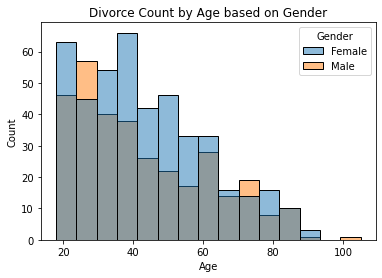

In [102]:
divorceplot = sns.histplot(divorcedf, x='Age',hue='Gender').set(title='Divorce Count by Age based on Gender')
plt.savefig('divorceplot')

In [103]:
maledivorced = census_df.loc[(census_df['Marital Status'] == 'Divorced')& 
                             (census_df['Gender'] == 'Male') ]
print(len(maledivorced))

327


In [104]:
femaledivorced = census_df.loc[(census_df['Marital Status'] == 'Divorced')& 
                               (census_df['Gender'] == 'Female' )]
print(len(femaledivorced))

441


In [105]:
#divorces using female divocee count
divorces = len(femaledivorced)
total_population = len(census_df)
di_rate = divorces/total_population
print(di_rate*1000)

57.84365162644281


In [106]:
married = census_df.loc[(census_df['Marital Status'] == 'Married')]
print(len(married))

2012


In [107]:
#marriage rate
num_married = len(married) / 2
mrate = num_married/total_population
print(mrate*1000)

131.9517313746065


### Crude Birth Rate

In [108]:
babies0 = census_df['Age'] == 0

In [109]:
len(census_df[babies0])

74

In [110]:
Total_livebirths = len(census_df[babies0])
Total_Population = len(census_df)
#crude birth rate per 1000
CBR = (Total_livebirths/Total_Population)* 1000
print('Crude Birth Rate : ' + str(CBR))

Crude Birth Rate : 9.706190975865686


In [111]:
babies4 = census_df['Age'] == 4
babies8 = census_df['Age'] == 8
babies12 = census_df['Age'] == 12

cbr_0_year = (len(census_df[babies0])/Total_Population)*1000
cbr_4_year = (len(census_df[babies4])/Total_Population)*1000
cbr_8_year =(len(census_df[babies8])/Total_Population)*1000
cbr_12_year =(len(census_df[babies12])/Total_Population)*1000

print('CBR (Current Year) : ' + str(cbr_0_year))
print('CBR (Previous 4 Years) : ' + str(cbr_4_year))
print('CBR (Previous 8 Years) : ' + str(cbr_8_year))
print('CBR (Previous 12 Years) : ' + str(cbr_12_year))

print (f"Current CBR Change from Previous year : {cbr_0_year - cbr_4_year}")

CBR (Current Year) : 9.706190975865686
CBR (Previous 4 Years) : 12.591815320041974
CBR (Previous 8 Years) : 12.591815320041974
CBR (Previous 12 Years) : 12.85414480587618
Current CBR Change from Previous year : -2.8856243441762874


### Fertility Rate by Age (Women of Child Bearing Age)

In [112]:
#women of child bearing age (br_age)

br_age_2024 = (census_df['Age'].between(20,24)) & (census_df['Gender'] =='Female')
br_age_2529 = (census_df['Age'].between(25,29)) & (census_df['Gender'] =='Female')
br_age_3034 = (census_df['Age'].between(30,34)) & (census_df['Gender'] =='Female')
br_age_3539 = (census_df['Age'].between(35,39)) & (census_df['Gender'] =='Female')

# fertility rate by age (frba)
frba_2024 = (len(census_df[babies0])/len(census_df[br_age_2024]))*1000
frba_2529 = (len(census_df[babies4])/len(census_df[br_age_2024]))*1000
frba_3034 = (len(census_df[babies8])/len(census_df[br_age_2024]))*1000
frba_3539 = (len(census_df[babies12])/len(census_df[br_age_2024]))*1000

print(f'Fertility Rate by Age 20-24 {frba_2024}')
print(f'Fertility Rate by Age 25-29 {frba_2529}')
print(f'Fertility Rate by Age 30-34 {frba_3034}')
print(f'Fertility Rate by Age 35-39 {frba_3539}')

Fertility Rate by Age 20-24 237.17948717948718
Fertility Rate by Age 25-29 307.69230769230774
Fertility Rate by Age 30-34 307.69230769230774
Fertility Rate by Age 35-39 314.1025641025641


### Fertility Rate (General)

In [113]:
#women of child bearing age(wcba) as 18 to 40
totalbirths = len(census_df[babies0]) + len(census_df[babies4]) + len(census_df[babies8])+len(census_df[babies12])
totalbr_age = len(census_df[br_age_2024])+len(census_df[br_age_2529]) + len(census_df[br_age_3034]) + len(census_df[br_age_3539])

fert_rate = (totalbirths/totalbr_age)*1000
                                                                         
print(f'General Fertility Rate: {fert_rate}')

General Fertility Rate: 290.73482428115017


### Crude Death Rate

#### Death Rate per anum

In [114]:
age_band1 = (census_df[(census_df['Age Group'] == '0-4')].count())
age_band2 = (census_df[(census_df['Age Group'] == '5-9')].count())
age_band3 = (census_df[(census_df['Age Group'] == '10-14')].count())
age_band4 = (census_df[(census_df['Age Group'] == '15-19')].count())
age_band5 = (census_df[(census_df['Age Group'] == '20-24')].count())
age_band6 = (census_df[(census_df['Age Group'] == '25-29')].count())
age_band7 = (census_df[(census_df['Age Group'] == '30-34')].count())
age_band8 = (census_df[(census_df['Age Group'] == '35-39')].count())
age_band9 = (census_df[(census_df['Age Group'] == '40-44')].count())
age_band10 = (census_df[(census_df['Age Group'] == '45-49')].count())
age_band11 = (census_df[(census_df['Age Group'] == '50-54')].count())
age_band12 = (census_df[(census_df['Age Group'] == '55-59')].count())
age_band13 = (census_df[(census_df['Age Group'] == '60-64')].count())
age_band14 = (census_df[(census_df['Age Group'] == '65-69')].count())
age_band15 = (census_df[(census_df['Age Group'] == '70-74')].count())
age_band16 = (census_df[(census_df['Age Group'] == '75-79')].count())
age_band17 = (census_df[(census_df['Age Group'] == '80-84')].count())
age_band18 = (census_df[(census_df['Age Group'] == '85-89')].count())
age_band19 = (census_df[(census_df['Age Group'] == '90-94')].count())
age_band20 = (census_df[(census_df['Age Group'] == '95-99')].count())
age_band21 = (census_df[(census_df['Age Group'] == '100+')].count())


death_band = [
    age_band21['Age'] - age_band20['Age'],
    age_band20['Age'] - age_band19['Age'],
    age_band19['Age'] - age_band18['Age'],
    age_band18['Age'] - age_band17['Age'],
    age_band17['Age'] - age_band16['Age'],
    age_band16['Age'] - age_band15['Age'],
    age_band15['Age'] - age_band14['Age'],
    age_band14['Age'] - age_band13['Age'],
    age_band13['Age'] - age_band12['Age'],
    age_band12['Age'] - age_band11['Age'],
    age_band11['Age'] - age_band10['Age'],
    age_band10['Age'] - age_band9['Age'],
    age_band9['Age'] - age_band8['Age'],
    age_band8['Age'] - age_band7['Age'],
    age_band7['Age'] - age_band6['Age'],
    age_band6['Age'] - age_band5['Age'],
    age_band5['Age'] - age_band4['Age'],
    age_band4['Age'] - age_band3['Age'],
    age_band3['Age'] - age_band2['Age'],
    age_band2['Age'] - age_band1['Age'],
    age_band1['Age']
]            

In [115]:
print(death_band)

[-3, -8, -49, -68, -49, -53, -28, -92, -53, -100, -71, -7, -37, 60, 16, -25, -5, 107, 1, 72, 400]


In [116]:
#death rate per 1000
death_rate_per_anum = (sum(death_band)/5)
print('Death Rate/Aunm : ' + str(death_rate_per_anum))

Death Rate/Aunm : 1.6


#### Aging Population

In [117]:
oldpop = census_df[census_df['Age'].between(65,100)].groupby('Age').size().sort_index(ascending = False)
oldpop

Age
100     1
99      4
98      1
97      1
96      1
95      4
94      4
93      5
92      2
91      1
90      7
89     12
88     14
87     14
86     14
85     14
84     17
83     30
82     32
81     25
80     32
79     31
78     40
77     41
76     38
75     35
74     43
73     46
72     46
71     52
70     51
69     46
68     56
67     59
66     53
65     52
dtype: int64

In [118]:
#shift ages to mimic previous year

prev_age = oldpop.shift(-1)
prev_age

Age
100     4.0
99      1.0
98      1.0
97      1.0
96      4.0
95      4.0
94      5.0
93      2.0
92      1.0
91      7.0
90     12.0
89     14.0
88     14.0
87     14.0
86     14.0
85     17.0
84     30.0
83     32.0
82     25.0
81     32.0
80     31.0
79     40.0
78     41.0
77     38.0
76     35.0
75     43.0
74     46.0
73     46.0
72     52.0
71     51.0
70     46.0
69     56.0
68     59.0
67     53.0
66     52.0
65      NaN
dtype: float64

In [119]:
#oldpop set difference

old_diff = oldpop - prev_age

#convert to a dataframe

old_diff = old_diff.reset_index(name='Count_Aging')

#SUBSET DEATHS ONLY

deaths = old_diff[old_diff['Count_Aging']<0]
deaths

,Age,Count_Aging
0,100,-3.0
4,96,-3.0
6,94,-1.0
9,91,-6.0
10,90,-5.0
11,89,-2.0
15,85,-3.0
16,84,-13.0
17,83,-2.0
19,81,-7.0


In [120]:
aged_deathrate = abs(((deaths["Count_Aging"]).sum())/Total_Population)*1000
aged_deathrate

11.149003147953831

In [121]:
crude_death = death_rate_per_anum +aged_deathrate
print("Crude Death Rate:  " + str(crude_death))

Crude Death Rate:  12.74900314795383


### Crude Growth Rate

In [122]:
#calculating Crude Growth Rate as CGR
CGR = CBR - crude_death
perc_CGR = CGR/10
print('Crude Growth Rate:  '+ str(CGR))
print('CGR Percentage  :  ' + str(perc_CGR) +'%' )

Crude Growth Rate:  -3.0428121720881443
CGR Percentage  :  -0.3042812172088144%


### Population Change

#### Migration

Number of immigrants (Lodgers and Visitors who are single) per thousand

In [123]:
num_imm = census_df.loc[(census_df['Relationship to Head of House'] == 'Lodger') + 
                        (census_df['Relationship to Head of House'] == 'Visitor')&
                        (census_df['Marital Status'] == 'Single')]
print('Total Immigrants:  ' +str(len(num_imm)))


Total Immigrants:  231


Number of Emmigrants (male and female divocees)

In [124]:
#number of male divocees
divorced_male = census_df.loc[(census_df['Marital Status'] == 'Divorced') & (census_df["Gender"] == 'Male')]
print(len(divorced_male))

#number of female divocees
divorced_female = census_df.loc[(census_df['Marital Status'] == 'Divorced') & (census_df["Gender"] == 'Female')]
print(len(divorced_female))

#total emmigration
num_emm = len(divorced_female) - len(divorced_male)
print("Total Emmigrants:  " + str(num_emm))

327
441
Total Emmigrants:  114


In [125]:
net_migration = len(num_imm) - num_emm
net_migration

117

### Population Change

In [126]:
pop_change = CBR + crude_death + num_emm + len(num_imm)
print('Population Change:  ' +str(pop_change))

Population Change:  367.4551941238195


### Number of Household & Average Household

In [127]:
census_df['Number in Household'] = census_df.groupby(['House Number', 'Street'])['Street'].transform('count')
census_df['Average Household'] = census_df.groupby([ 'Street'])['Number in Household'].transform('mean')
#Number of Household and Average Household Columns have been created.

In [128]:
median = census_df['Number in Household'].median()
median

3.0

In [129]:
census_df['Number in Household'].mode()

0    3
Name: Number in Household, dtype: int64

In [130]:
household = census_df['Number in Household']
avghousehold = census_df['Average Household']
sum_household = household.sum()
sum_avghousehold = avghousehold.sum()
print(sum_household)
print(sum_avghousehold)

29670
29670.0


In [131]:
diff_household = census_df['Number in Household'] - median
diff_household

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
7619    2.0
7620    2.0
7621    2.0
7622    2.0
7623    2.0
Name: Number in Household, Length: 7624, dtype: float64

In [132]:
over_occupancy = census_df[census_df['Number in Household']>5]
#checking number of houses that are overcrowded is maximum capacity is assumed as 3(meadian)
len(over_occupancy)

908

In [133]:
dfr = census_df['Number in Household'] - median
rf = dfr.tolist()
num = 0
for i in rf:
    if i < 0:
        num += 1
print(num)

2499


In [134]:
#houses with high occupancy
high_occupancy = census_df[census_df['Number in Household']> 10]
len(high_occupancy)

339

### Occupancy Rate

In [135]:
occupancy = census_df.groupby(['House Number','Street']).size().reset_index(name = 'Occupancy Count')
occupancy

,House Number,Street,Occupancy Count
0,1,Abbott Drive,2
1,1,Anderson Trail,2
2,1,Anvil Drive,5
3,1,Anvil Lighthouse,12
4,1,Appletreeshy Drive,4
...,...,...,...
2964,214,William Drive,3
2965,215,William Drive,2
2966,216,William Drive,1
2967,217,William Drive,1


In [136]:
occupancy.loc[occupancy['Occupancy Count']>10]

,House Number,Street,Occupancy Count
3,1,Anvil Lighthouse,12
21,1,Davis Warehouse,11
61,1,Pigeon Place,12
140,2,Landings Lane,11
376,5,Anvil Drive,12
407,5,King Street,22
516,6,Reynolds Drives,12
579,7,King Street,22
580,7,Landings Lane,11
738,9,Landings Lane,15


In [137]:
occupancy['Occupancy Count'].max()

22

In [138]:
occupancy.loc[occupancy['Occupancy Count']== 1]

,House Number,Street,Occupancy Count
5,1,Apricot Road,1
17,1,Chandler Flats,1
28,1,Foxglove Street,1
29,1,Foxglovebox Lane,1
30,1,Glorious Obervatory,1
...,...,...,...
2960,211,Tulip Street,1
2961,211,William Drive,1
2963,213,William Drive,1
2966,216,William Drive,1


In [139]:
census_df.groupby(['Surname','Street','House Number']).count()

Index  First Name  Age  \
Surname Street            House Number                           
Abbott  Aries Causeway    1                 5           5    5   
        Cottingham Street 13                1           1    1   
        O'Connor Fork     21                2           2    2   
        Reynolds Drives   38                1           1    1   
                          39                1           1    1   
...                                       ...         ...  ...   
Young   Reynolds Drives   1                 3           3    3   
        Tiger Avenue      97                1           1    1   
        Virgo Vista       16                1           1    1   
                          185               4           4    4   
        Willow Lane       12                1           1    1   

                                        Relationship to Head of House  \
Surname Street            House Number                                  
Abbott  Aries Causeway    1                                         5   
        Cottingham Street 13                                        1   
        O'Connor Fork     21                                        2   
        Reynolds Drives   38                                        1   
                          39                                        1   
...                                                               ...   
Young   Reynolds Drives   1                                         3   
        Tiger Avenue      97                                        1   
        Virgo Vista       16                                        1   
                          185                                       4   
        Willow Lane       12                                        1   

                                        Marital Status  Gender  Occupation  \
Surname Street            House Number                                       
Abbott  Aries Causeway    1                          5       5           5   
        Cottingham Street 13                         1       1           1   
        O'Connor Fork     21                         2       2           2   
        Reynolds Drives   38                         1       1           1   
                          39                         1       1           1   
...                                                ...     ...         ...   
Young   Reynolds Drives   1                          3       3           3   
        Tiger Avenue      97                         1       1           1   
        Virgo Vista       16                         1       1           1   
                          185                        4       4           4   
        Willow Lane       12                         1       1           1   

                                        Infirmity  Religion  \
Surname Street            House Number                        
Abbott  Aries Causeway    1                     5         5   
        Cottingham Street 13                    1         1   
        O'Connor Fork     21                    2         2   
        Reynolds Drives   38                    1         1   
                          39                    1         1   
...                                           ...       ...   
Young   Reynolds Drives   1                     3         3   
        Tiger Avenue      97                    1         1   
        Virgo Vista       16                    1         1   
                          185                   4         4   
        Willow Lane       12                    1         1   

                                        Employment Category  Age Group  \
Surname Street            House Number                                   
Abbott  Aries Causeway    1                               5          5   
        Cottingham Street 13                              1          1   
        O'Connor Fork     21                              2          2   
        Reynolds Drives   

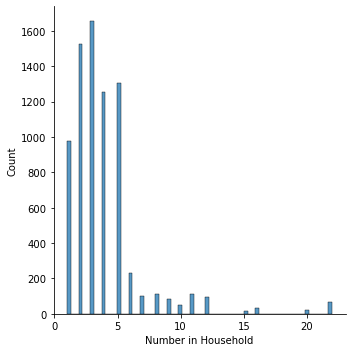

In [140]:
sns.displot(data= census_df,x='Number in Household')

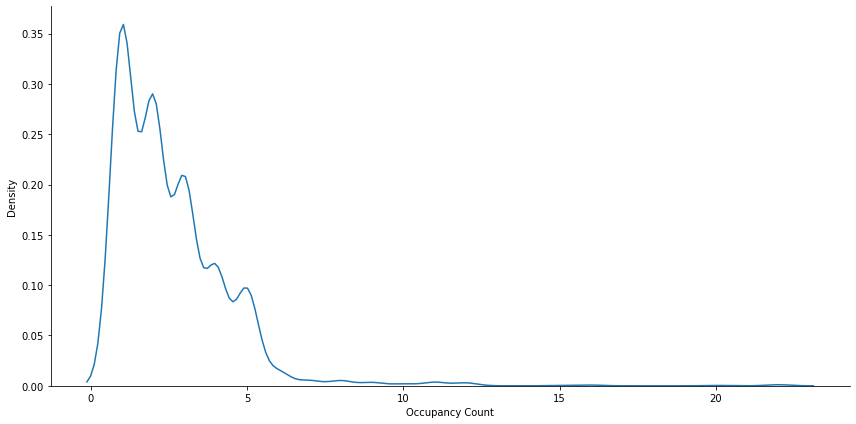

In [141]:
sns.displot(data=occupancy, x='Occupancy Count', height= 6, aspect=2, kind = 'kde')

#### Marriage and Age

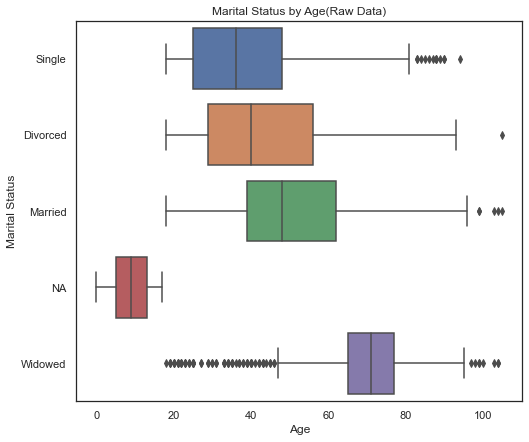

In [142]:
 sns.set(rc={'figure.figsize':(8,7)})
sns.set_style('white')
sns.despine()
boxplot = sns.boxplot(data =census_df, x = 'Age', y= 'Marital Status', 
                      width=0.8).set(title= 'Marital Status by Age(Raw Data)')
plt.savefig('boxplot')

#### Age Plot Based on Marriage

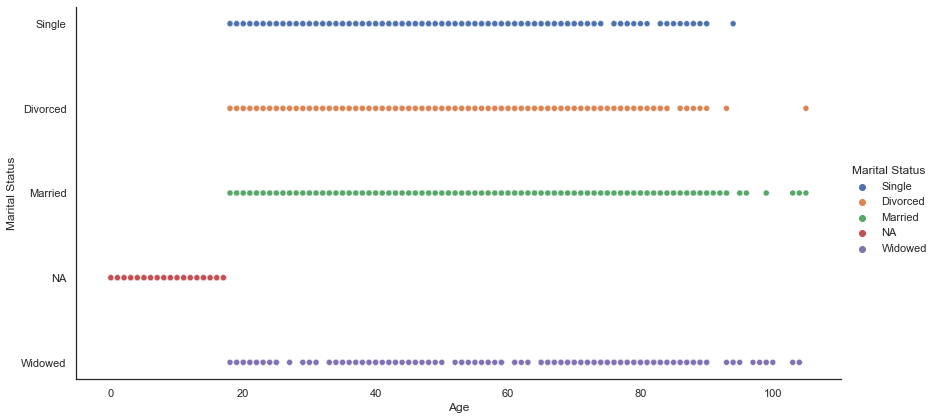

In [143]:
agemaritalplot1 = sns.relplot(data = census_df, x= 'Age', y = 'Marital Status', hue = 'Marital Status',
                        height = 6, aspect = 2)
plt.savefig('agemaritalplot1')

#### Marital Status Count Based on Gender

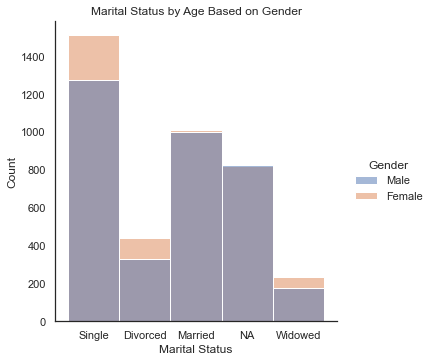

In [144]:
sns.displot(data = census_df, x='Marital Status',
            hue= 'Gender').set(title= 'Marital Status by Age Based on Gender')

### Employment Category By Age

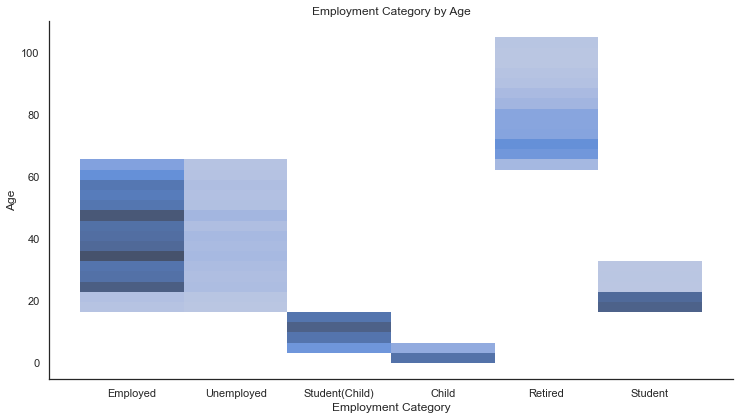

In [145]:
category = sns.displot(data = census_df, x = 'Employment Category',y='Age',
                       height = 5.8, aspect =1.8).set(title ="Employment Category by Age")
plt.savefig('category')

### Retired 

In [146]:
census_df.loc[(census_df['Age'] > 100)] #& (census_df["Occupation"] == 'None')]

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Category,Age Group,Number in Household,Average Household
1989,1989,8,Minster Summit,Daniel,Robinson,105,Head,Divorced,Male,"Retired Lecturer, higher education",None,Catholic,Retired,100+,1,2.047619
3307,3307,115,Harris Place,Dawn,Smith,104,Head,Married,Female,Retired Multimedia specialist,None,None,Retired,100+,2,3.640602
3308,3308,115,Harris Place,Wayne,Smith,105,Husband,Married,Male,Retired Cytogeneticist,None,None,Retired,100+,2,3.640602
3865,3865,142,Tulip Street,Dawn,Townsend,104,Head,Widowed,Female,Retired Public librarian,None,Christian,Retired,100+,1,1.950920
5339,5339,124,Virgo Vista,Russell,Richardson,103,Head,Married,Male,Retired Games developer,None,None,Retired,100+,2,3.119231
5844,5844,81,William Drive,Jeffrey,Russell,104,Head,Widowed,Male,"Retired Optician, dispensing",None,Methodist,Retired,100+,1,1.941176
6425,6425,12,Bath Road,Vincent,Phillips,103,Head,Widowed,Male,Retired Recycling officer,None,Christian,Retired,100+,1,6.815385


In [147]:
#retired Dataframe
Retired = census_df.loc[(census_df['Age'] > 64) & (census_df["Occupation"] == 'Unemployed')]

<AxesSubplot:xlabel='Age', ylabel='Count'>

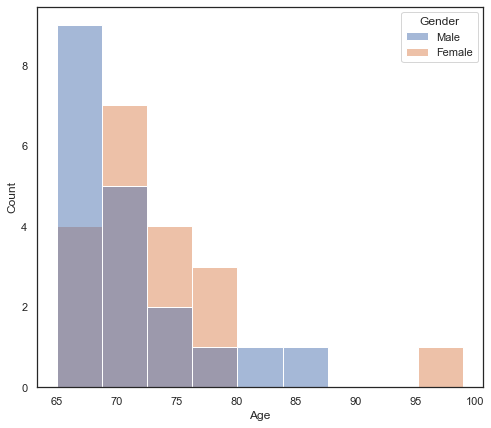

In [148]:
#retired by Age based on gender
sns.histplot(data = Retired, x ='Age', hue= 'Gender')

### Unemployed

In [149]:

#retired_df = census_df.loc[(census_df['Age'] > 64) & (census_df["Occupation"] == 'Unemployed')]
Unemployed =census_df.loc[(census_df["Occupation"] == 'Unemployed')]

In [150]:
Unemployed

,Index,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Category,Age Group,Number in Household,Average Household
1,1,1,Phillips Overpass,Karl,Smith,64,None,Single,Male,Unemployed,None,None,Unemployed,60-64,5,3.392857
6,6,2,Phillips Overpass,Ronald,Lewis,29,Son,Divorced,Male,Unemployed,None,Christian,Unemployed,25-29,3,3.392857
29,29,9,Phillips Overpass,Melissa,Sykes,43,Head,Widowed,Female,Unemployed,None,None,Unemployed,40-44,5,3.392857
49,49,16,Phillips Overpass,Lynne,Coleman,36,Head,Married,Female,Unemployed,None,Methodist,Unemployed,35-39,2,3.392857
51,51,17,Phillips Overpass,Sarah,Davies,42,Head,Married,Female,Unemployed,None,Catholic,Unemployed,40-44,3,3.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,7523,29,Portsmouth Freeway,Katie,Gill,20,Head,Single,Female,Unemployed,None,Christian,Unemployed,20-24,3,2.047619
7542,7542,1,Truro Longhouse,Ruth,Ryan,33,Head,Widowed,Female,Unemployed,None,Christian,Unemployed,30-34,5,5.000000
7557,7557,1,Evans Keep,Alison,Jenkins,42,Head,Single,Female,Unemployed,None,Christian,Unemployed,40-44,2,2.000000
7567,7567,1,Campbell Warehouse,Rosemary,Murphy,38,None,Single,Female,Unemployed,None,Catholic,Unemployed,35-39,9,9.000000


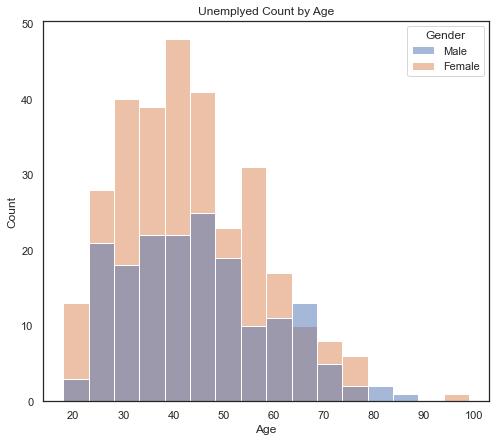

In [151]:
#unemployed by age
unemployedplot = sns.histplot(data = Unemployed, x ='Age'
                              , hue= 'Gender').set(title= 'Unemplyed Count by Age')
plt.savefig('unemployedplot')

### Relationship to Head of House by Age

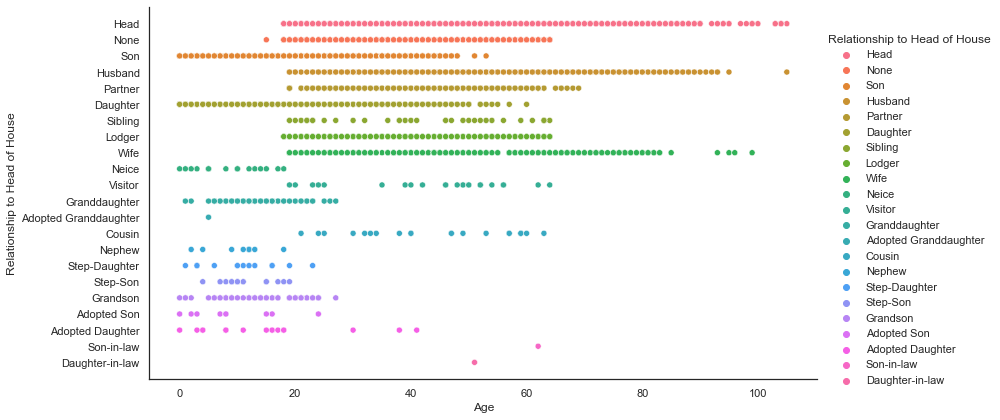

In [152]:
agerelationship_plot = sns.relplot(data = census_df, x= 'Age', y = 'Relationship to Head of House', hue = 'Relationship to Head of House',
                        height = 6, aspect = 2)
plt.savefig('agerelationship_plot')